In [68]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [69]:
annualfoodcpi = Path("Outside Resources/annualfoodcpi.csv")
snap = Path("Outside Resources/US SNAP Participants – US Census.csv")
unemployed = Path("Outside Resources/US Unemployment Percentages (BLS).csv")

In [70]:
annualfoodcpi_df = pd.read_csv(annualfoodcpi)
snap_df = pd.read_csv(snap)
unemployed_df = pd.read_csv(unemployed)

In [71]:
trends1_df = pd.merge(annualfoodcpi_df, unemployed_df, how="left", on="Year")
trends1_df.head()
trends1_df.dropna(axis=1)

,Year,"Meats, Poultry, Fish, and Eggs",Fruits and Vegetables,Dairy and Related Product,Unemployment %
0,2019,249.785,300.873,218.677,3.7
1,2020,265.173,304.944,228.322,8.1
2,2021,282.784,314.813,231.422,5.3
3,2022,313.667,341.668,259.184,3.6
4,2023,319.297,350.180,269.528,3.6
5,2024,326.254,352.801,268.876,4.0


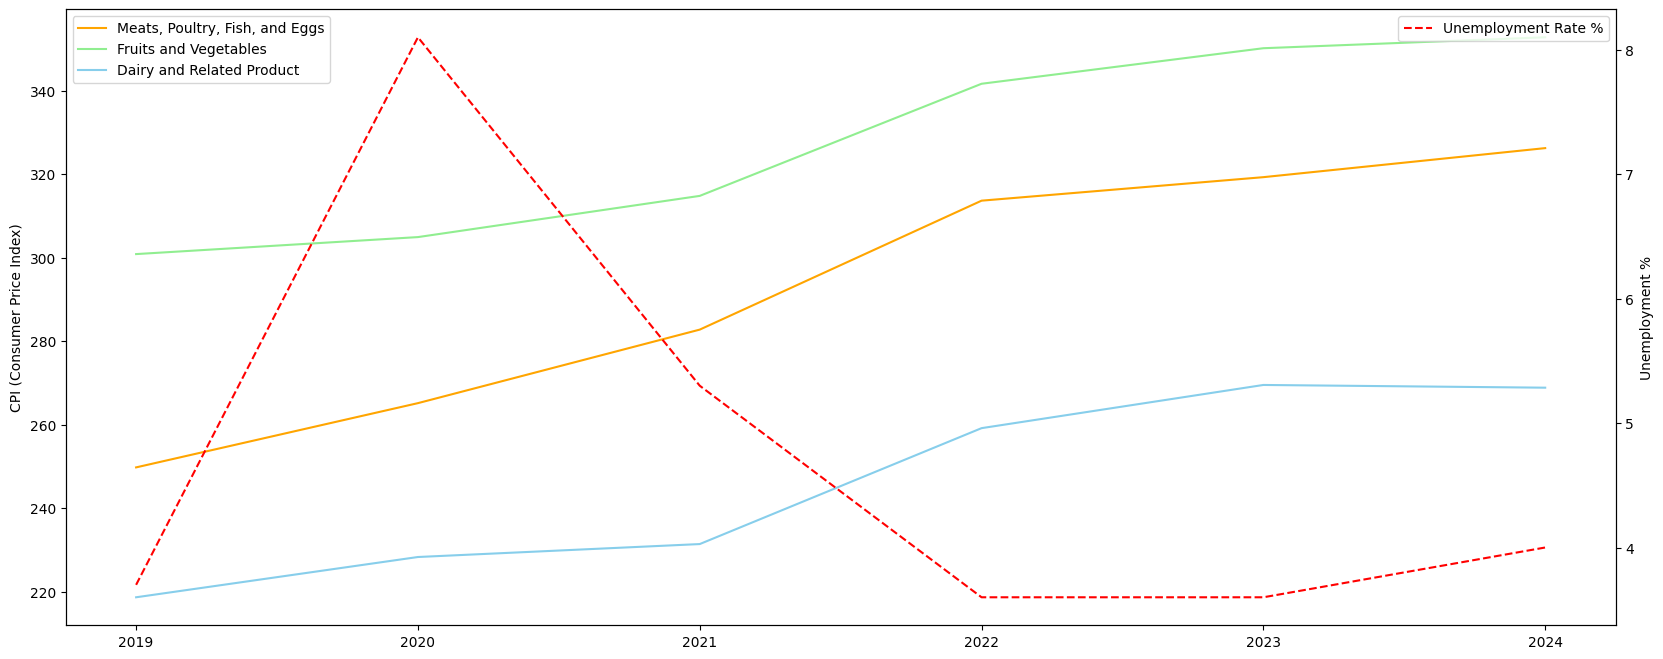

In [106]:
fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.plot(trends1_df["Year"], trends1_df["Meats, Poultry, Fish, and Eggs"], label="Meats, Poultry, Fish, and Eggs", color="orange")
ax1.plot(trends1_df["Year"], trends1_df["Fruits and Vegetables"], label="Fruits and Vegetables", color="lightgreen")
ax1.plot(trends1_df["Year"], trends1_df["Dairy and Related Product"], label="Dairy and Related Product", color="skyblue")
ax1.set_ylabel("CPI (Consumer Price Index)", color="black")

ax2 = ax1.twinx()  
ax2.plot(trends1_df["Year"], trends1_df["Unemployment %"], label="Unemployment Rate %", color="red", linestyle="dashed")
ax2.set_ylabel("Unemployment %", color="black")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [73]:
trends2_df = pd.merge(annualfoodcpi_df, snap_df, how="left", on="Year")
filtered_trends2 = trends2_df[trends2_df["Year"] <= 2023]
filtered_trends2.head(11)

,Year,"Meats, Poultry, Fish, and Eggs",Fruits and Vegetables,Dairy and Related Product,SNAP Participants %
0,2019,249.785,300.873,218.677,10.7
1,2020,265.173,304.944,228.322,11.4
2,2021,282.784,314.813,231.422,12.4
3,2022,313.667,341.668,259.184,12.4
4,2023,319.297,350.180,269.528,12.2


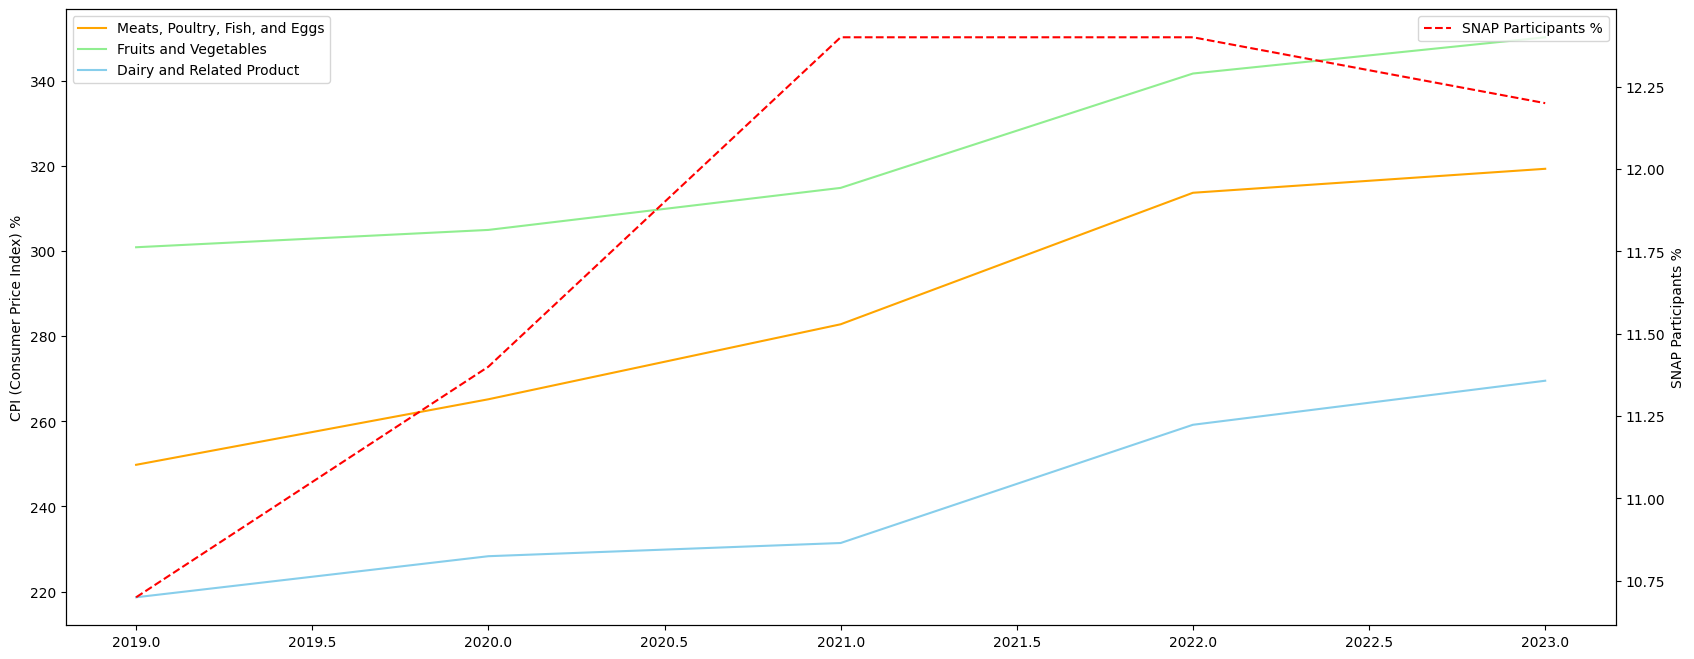

In [107]:
fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.plot(filtered_trends2["Year"], filtered_trends2["Meats, Poultry, Fish, and Eggs"], label="Meats, Poultry, Fish, and Eggs", color="orange")
ax1.plot(filtered_trends2["Year"], filtered_trends2["Fruits and Vegetables"], label="Fruits and Vegetables", color="lightgreen")
ax1.plot(filtered_trends2["Year"], filtered_trends2["Dairy and Related Product"], label="Dairy and Related Product", color="skyblue")
ax1.set_ylabel("CPI (Consumer Price Index) %", color="black")

ax2 = ax1.twinx()  
ax2.plot(filtered_trends2["Year"], filtered_trends2["SNAP Participants %"], label="SNAP Participants %", color="red", linestyle="dashed")
ax2.set_ylabel("SNAP Participants %", color="black")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

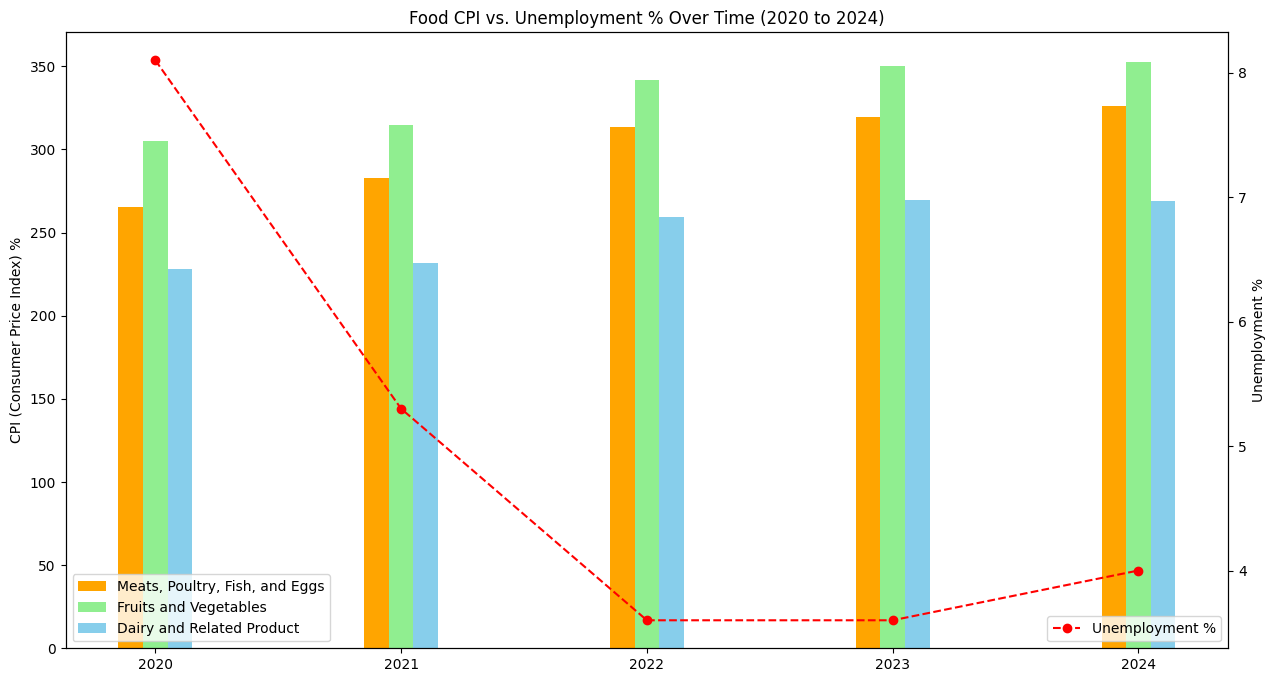

In [98]:
trends1_filtered = trends1_df[trends1_df["Year"] >= 2020]

fig, ax1 = plt.subplots(figsize=(15, 8))

bar_width = 0.10
years = trends1_filtered["Year"]

x_indexes = np.arange(len(years))

ax1.bar(x_indexes - bar_width, trends1_filtered["Meats, Poultry, Fish, and Eggs"], width=bar_width, label="Meats, Poultry, Fish, and Eggs", color="orange")
ax1.bar(x_indexes, trends1_filtered["Fruits and Vegetables"], width=bar_width, label="Fruits and Vegetables", color="lightgreen")
ax1.bar(x_indexes + bar_width, trends1_filtered["Dairy and Related Product"], width=bar_width, label="Dairy and Related Product", color="skyblue")

ax1.set_ylabel("CPI (Consumer Price Index) %", color="black")
ax1.set_xticks(x_indexes)
ax1.set_xticklabels(years)

ax2 = ax1.twinx()
ax2.plot(x_indexes, trends1_filtered["Unemployment %"], label="Unemployment %", color="red", marker="o", linestyle="dashed")
ax2.set_ylabel("Unemployment %", color="black")

ax1.legend(loc="lower left")
ax2.legend(loc="lower right")

plt.title("Food CPI vs. Unemployment % Over Time (2020 to 2024)")

plt.show()

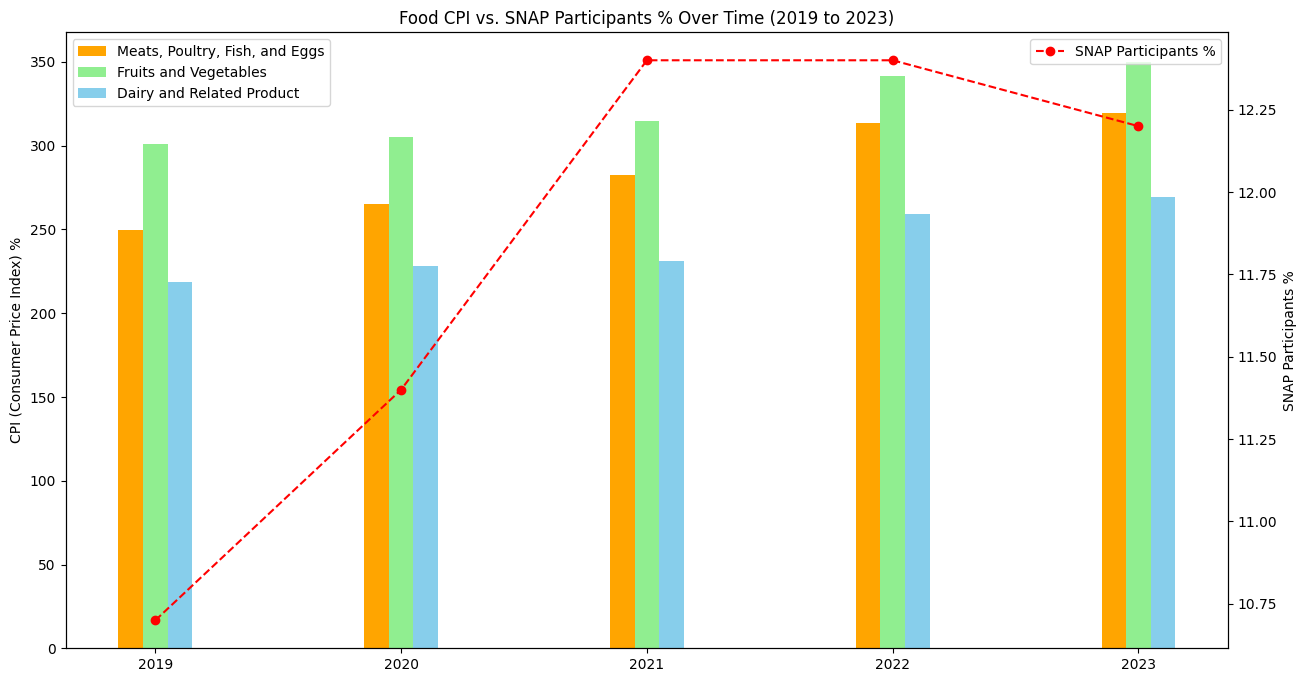

In [105]:
trends2_filtered = trends2_df[trends2_df["Year"] <= 2023]

fig, ax1 = plt.subplots(figsize=(15, 8))

bar_width = 0.10
years = filtered_df["Year"]

x_indexes = np.arange(len(years))

ax1.bar(x_indexes - bar_width, filtered_df["Meats, Poultry, Fish, and Eggs"], width=bar_width, label="Meats, Poultry, Fish, and Eggs", color="orange")
ax1.bar(x_indexes, filtered_df["Fruits and Vegetables"], width=bar_width, label="Fruits and Vegetables", color="lightgreen")
ax1.bar(x_indexes + bar_width, filtered_df["Dairy and Related Product"], width=bar_width, label="Dairy and Related Product", color="skyblue")

ax1.set_ylabel("CPI (Consumer Price Index) %", color="black")
ax1.set_xticks(x_indexes)
ax1.set_xticklabels(years)

ax2 = ax1.twinx()
ax2.plot(x_indexes, filtered_df["SNAP Participants %"], label="SNAP Participants %", color="red", marker="o", linestyle="dashed")
ax2.set_ylabel("SNAP Participants %", color="black")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Food CPI vs. SNAP Participants % Over Time (2019 to 2023)")

plt.show()